In [1]:
pip install opencv-python scikit-learn numpy matplotlib

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
    --------------------------------------- 0.2/9.3 MB 4.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/9.3 MB 5.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/9.3 MB 5.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.3 MB 5.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/9.3 MB 6.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/9.3 MB 6.2 MB/s eta 0:00:02
   -------- ------------------------------- 2.0/9.3 MB 5.9 MB/s eta 0:00:02
   --------- ------------------------------ 2.3/9.3 MB 6.0 MB/s eta 0:00:02
   ----------- ---------------------------- 2.6/9.3 MB 6.1 MB/s eta 0:00:02
   ------------ --------------------------- 2.9/9.3 MB 6.1 MB/s eta 0:00:02
   ------------- --

In [55]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt 
import numpy as np 
import cv2

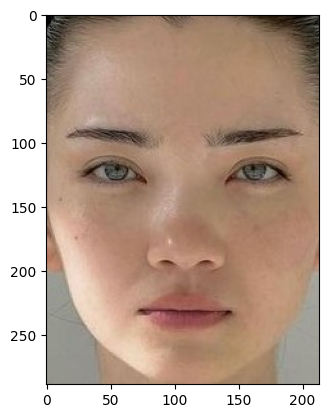

In [103]:
image = cv2.imread("C:\\Users\\Bulanabela\\OneDrive - Bina Nusantara\\Documents\\PROTOTYPE AI\\sample\\sample2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [67]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [73]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [91]:
def color_analysis(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    print(hex_colors)

c:\Users\Bulanabela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


['#8a6858', '#b49987', '#e6c6b0', '#48382d', '#aa866e']


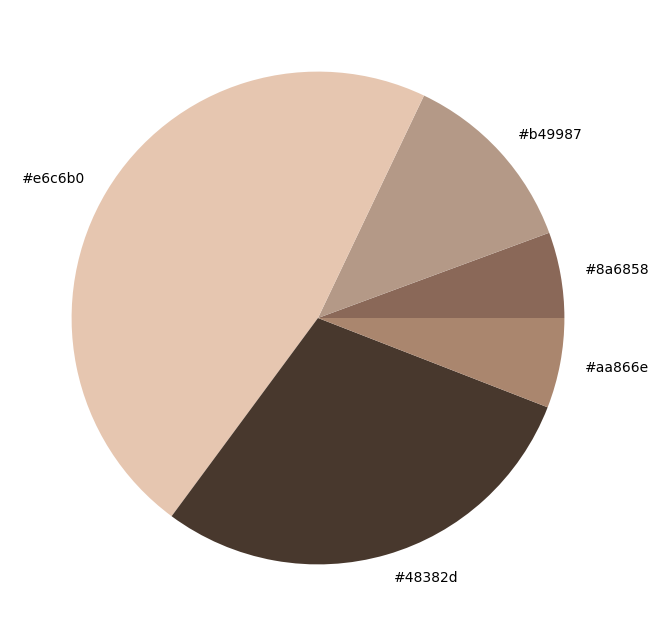

In [104]:
modified_image = prep_image(image)
color_analysis(modified_image)